### Understading of strategy risk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from FinancialMachineLearning.backtest.strategy_risk import *

In [2]:
out, p = [], 0.55
for i in range(1000000) :
    rnd = np.random.binomial(n = 1, p = p)
    x = (1 if rnd == 1 else -1)
    out.append(x)
print(np.mean(out), np.std(out), np.mean(out) / np.std(out))

0.099806 0.9950069157367705 0.10030684050682893


In [83]:
sl = np.arange(-0.0001, -0.0101, -0.0001).round(5)

In [85]:
freq = np.arange(10,110,1)

In [86]:
values = get_grid_precision(sl, 0.1, freq, 1.5)

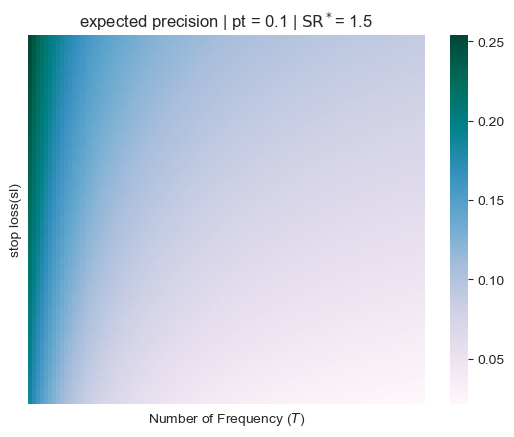

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(values, cmap = 'PuBuGn')
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel(r'Number of Frequency ($T$)')
plt.ylabel('stop loss(sl)')
plt.title(r"expected precision | pt = 0.1 | $\mathrm{SR}^*$= 1.5")
plt.show()

In [7]:
values = get_grid_precision(sl, 0.2, freq, 1.5)

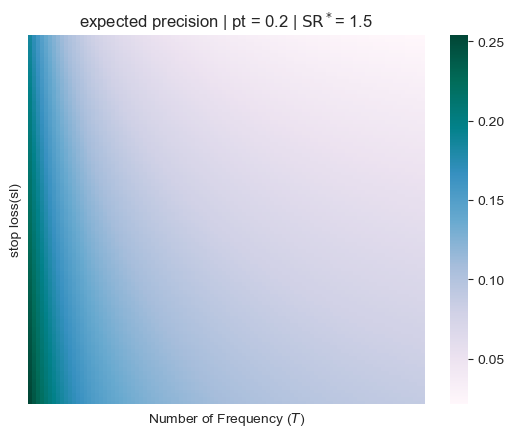

In [8]:
sns.heatmap(values, cmap = 'PuBuGn')
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel(r'Number of Frequency ($T$)')
plt.ylabel('stop loss(sl)')
plt.title(r"expected precision | pt = 0.2 | $\mathrm{SR}^*$= 1.5")
plt.show()

In [9]:
values = get_grid_precision(sl, 0.3, freq, 1.5)

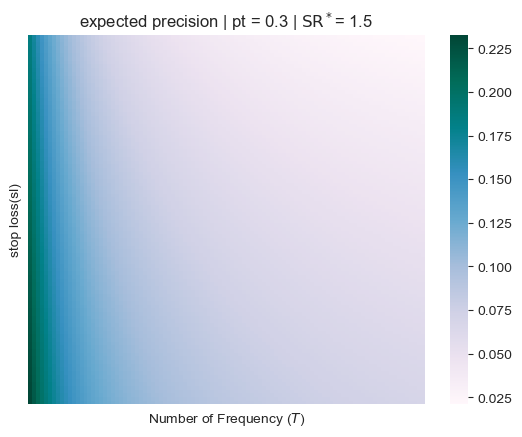

In [10]:
sns.heatmap(values, cmap = 'PuBuGn')
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel(r'Number of Frequency ($T$)')
plt.ylabel('stop loss(sl)')
plt.title(r"expected precision | pt = 0.3 | $\mathrm{SR}^*$= 1.5")
plt.show()

In [11]:
values = get_grid_precision(sl, 1.0, freq, 1.5)

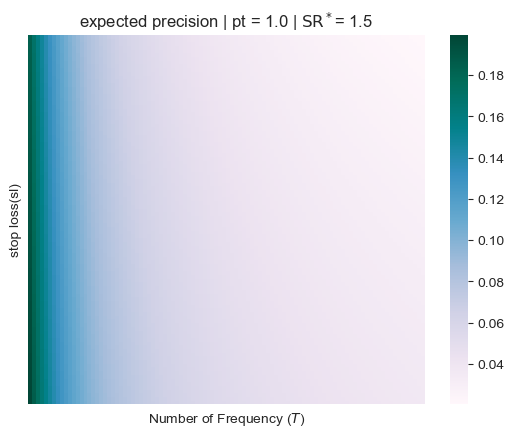

In [12]:
sns.heatmap(values, cmap = 'PuBuGn')
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel(r'Number of Frequency ($T$)')
plt.ylabel('stop loss(sl)')
plt.title(r"expected precision | pt = 1.0 | $\mathrm{SR}^*$= 1.5")
plt.show()

In [13]:
values = get_grid_precision(sl, 0.01, freq, 1.5)

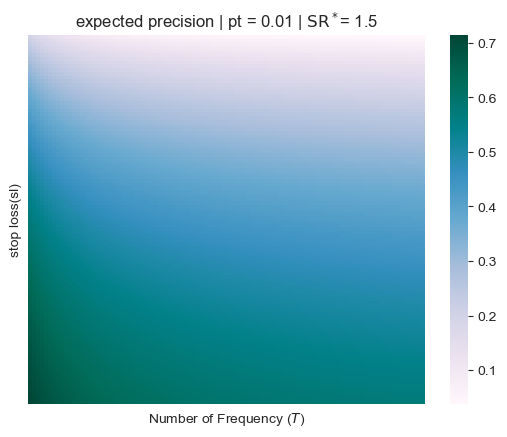

In [14]:
sns.heatmap(values, cmap = 'PuBuGn')
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel(r'Number of Frequency ($T$)')
plt.ylabel('stop loss(sl)')
plt.title(r"expected precision | pt = 0.01 | $\mathrm{SR}^*$= 1.5")
plt.show()

**내재된 베팅 빈도의 계산**

In [61]:
def binFreq(stop_loss, profit_taking, precision, t_sharpe_ratio) :
    freq = (t_sharpe_ratio * (profit_taking - stop_loss)) ** 2*precision*(1 - precision) / ((profit_taking - stop_loss) * precision + stop_loss)**2
    return freq

손절(y) 정밀도(x) 함수로 그리기

In [98]:
sl = np.arange(-0.00005, -0.00505, -0.00005).round(5)
precision = np.arange(0.5, 0.6, 0.001).round(4)

In [115]:
values = np.ones(len(sl) * len(precision)).reshape(len(sl), len(precision))
for i in range(len(sl)):
    for j in range(len(precision)):
        values[i][j] = binFreq(sl[i], 0.1, precision[j], 1.5)
values = pd.DataFrame(
    values, columns = precision, index = sl
)

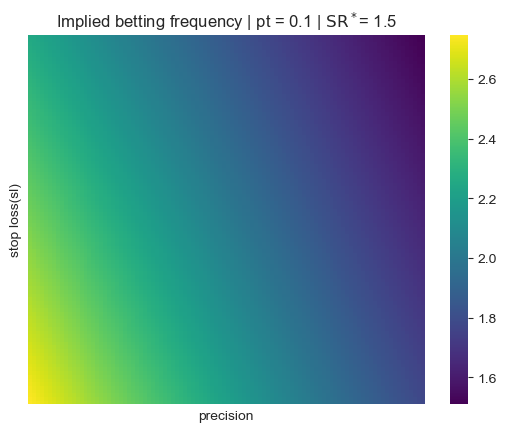

In [116]:
sns.heatmap(values, cmap = 'viridis')
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('precision')
plt.ylabel('stop loss(sl)')
plt.title(r"Implied betting frequency | pt = 0.1 | $\mathrm{SR}^*$= 1.5")
plt.show()